<a href="https://colab.research.google.com/github/HunterTzou/DATA_110_FALL_2025/blob/main/Tzou_Hunter_Week_5_and_6_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%%capture
if 'google.colab' in str(get_ipython()):
  !pip install contextily

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from enum import unique

titanic = sns.load_dataset("titanic")

In [6]:
print("Titanic Info:")
titanic.info()

print("\n")
print("Titanic First 5 Rows:", titanic.head(5))

print("\n")
print("Unique Class:", titanic['class'].unique())

Titanic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


Titanic First 5 Rows:    survived  pclass     sex   age  sibsp 

### Data Definitions:

| **Column**         |                          **Description** |
|---------------------|------------------------------------------|
| **survived**        |                                           1 = survived, 0 = did not survive |
| **pclass**          |                                           Passenger class (1st, 2nd, or 3rd) |
| **sex**             |                                           Gender of the passenger |
| **age**             |                                           Age in years |
| **sibsp**           |                                           Number of siblings/spouses aboard |
| **parch**           |                                           Number of parents/children aboard |
| **fare**            |                                           Passenger fare |
| **embarked**        |                                           Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton) |
| **class**           |                                           Class name (same info as `pclass`, but as a string) |
| **who**             |                                           Man, woman, or child (derived from age and sex) |
| **adult_male**      |                                           True if the passenger is an adult male |
| **deck**            |                                           Deck level (A–G) |
| **embark_town**     |                                           Full name of embarkation town |
| **alive**           |                                           "yes" if survived, "no" otherwise |
| **alone**           |                                           True if traveling alone |


## **Task 1 — Dataset overview**  
Identify the variables you will use (`survived, pclass, sex, age, fare, embark_town, sibsp, parch`). briefly explain why these columns matter for your analysis.

<br>


I will probably use `sex`, `age`,`class`, `alive`, `alone`, `deck`, `sibsp`, and `parch`. I am really interested to see the demographics of the people who survived and those who died to see if we can make inferences about what their circumstances were and possibly about how societal standards were at the time.

<br>


For example:
- Did more women and children survive or men?
- Did class have a correlation with how many people survived?

<br>

`sex`, `age`,`class`, `alive`, `alone`, `sibsp`, and `parch` will help me to uncover that.

<br>


I wanted to include the `deck` too to see if we can infer if people on higher decks were more likely to survive.  

---
<br>

## **Task 2 — Fare distribution (histogram + KDE).**

Create a histogram and a KDE of `fare`. Discuss right-skew, outliers, and a socioeconomic interpretation.


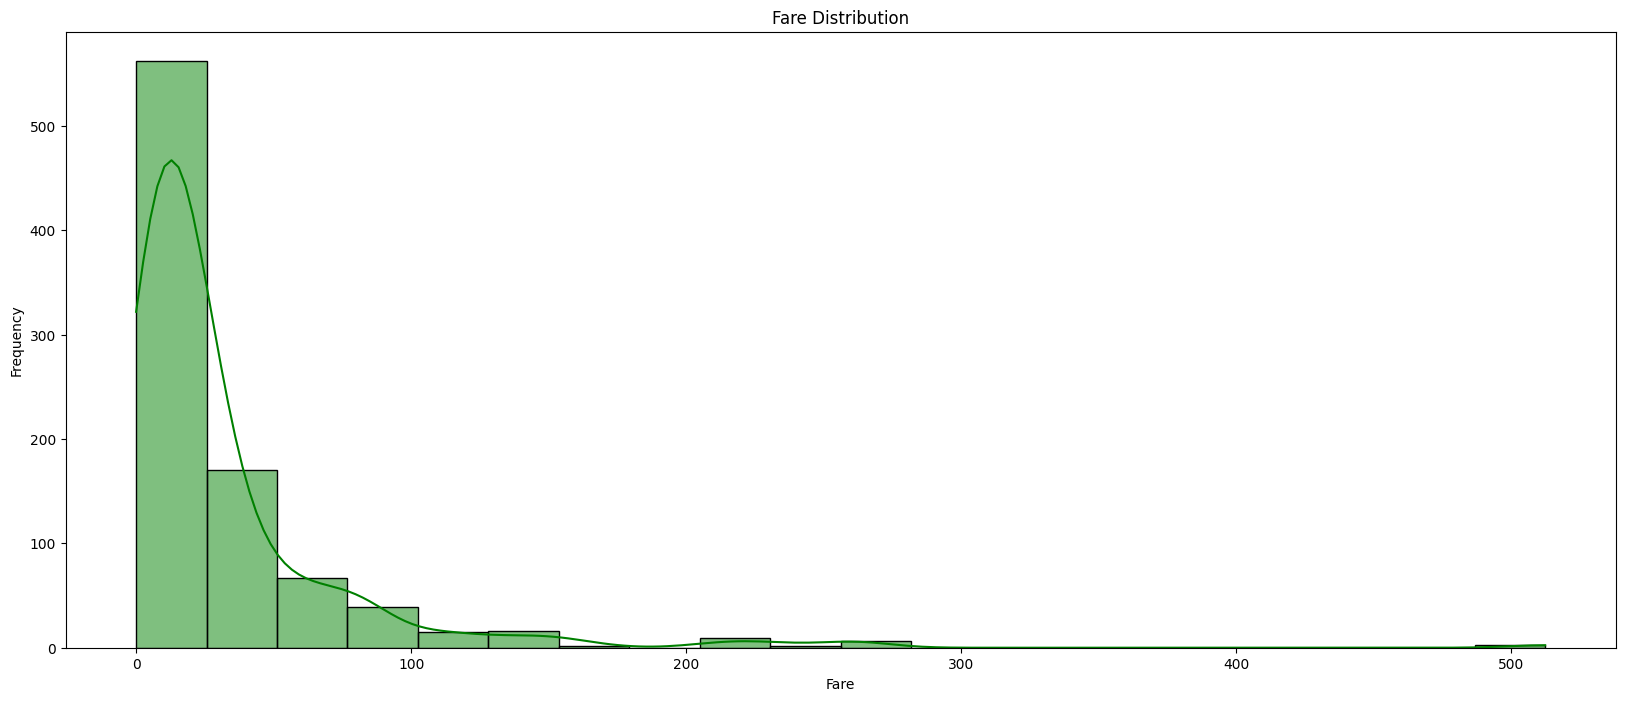

In [5]:
plt.figure(figsize=(20, 8))

sns.histplot(data = titanic, x = "fare", kde = True, color = "green", bins=20)


plt.title("Fare Distribution")
plt.xlabel("Fare")
plt.ylabel("Frequency")
plt.show()

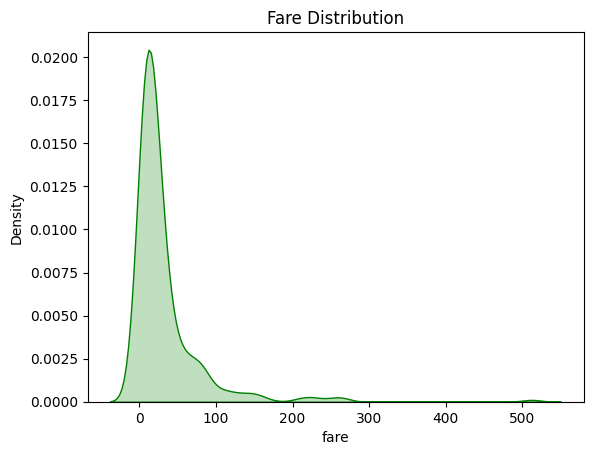

In [6]:
sns.kdeplot(data = titanic, x = "fare", fill= True, color = "green")

plt.title("Fare Distribution")
plt.show()

### Reflection

It looks like a majority of the tickets were below the 50 dollar mark. The number of bins changes where the majority appears, so I don't know where the cutoff window is for the majority of people, but it seems like it was even below 25 dollars. It seems like there were a large number of lower class passengers. I would like to investigate further, so that is what I did below.

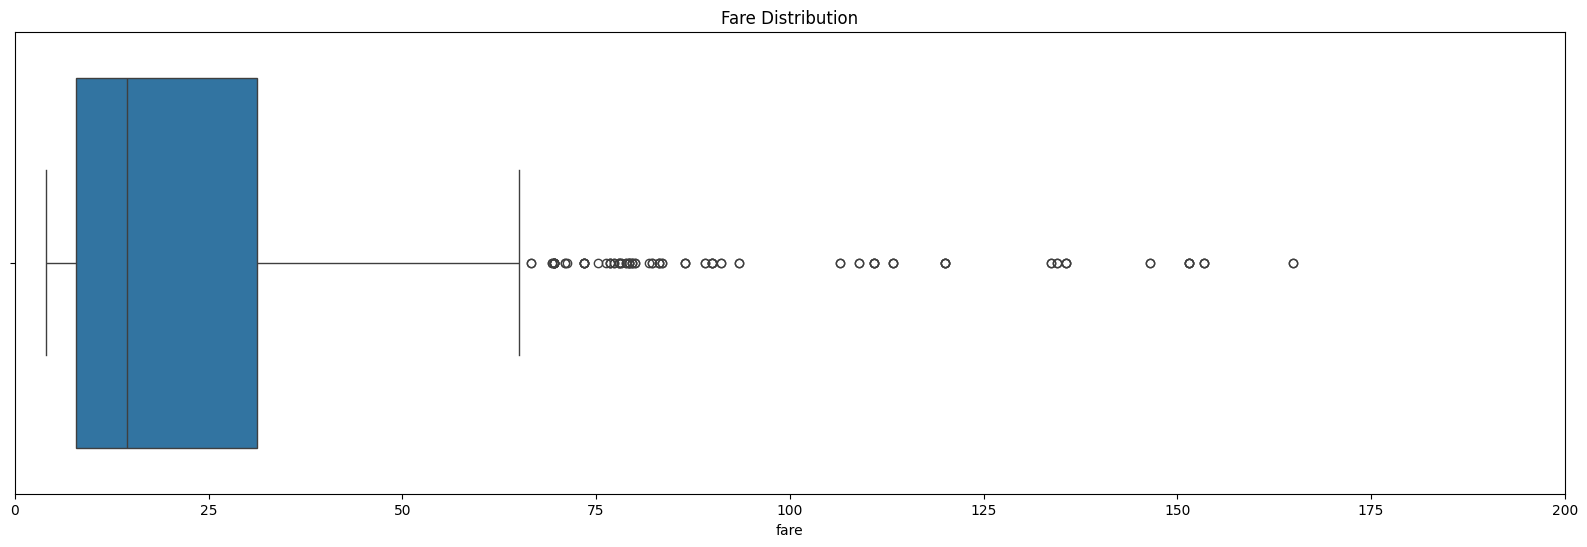

In [7]:
plt.figure(figsize=(20, 6))

titanic = titanic[titanic["fare"] > 0]

sns.boxplot(data = titanic, x = "fare")

plt.xlim(0, 200)
plt.title("Fare Distribution")
plt.show()

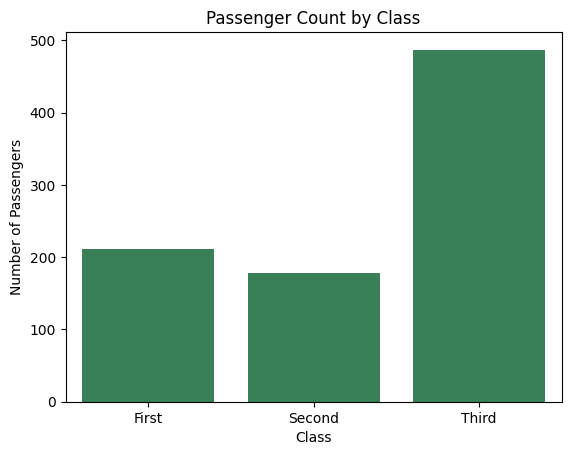

In [8]:
sns.countplot(
    data=titanic,
    x="class",
    color = "seagreen"
)

plt.title("Passenger Count by Class")
plt.xlabel("Class")
plt.ylabel("Number of Passengers")
plt.show()

I was also curious to see how many people survived based on their class. It looks like most of the deaths were in the third class. Larger majorities of the people in 2nd and 3rd class survived.

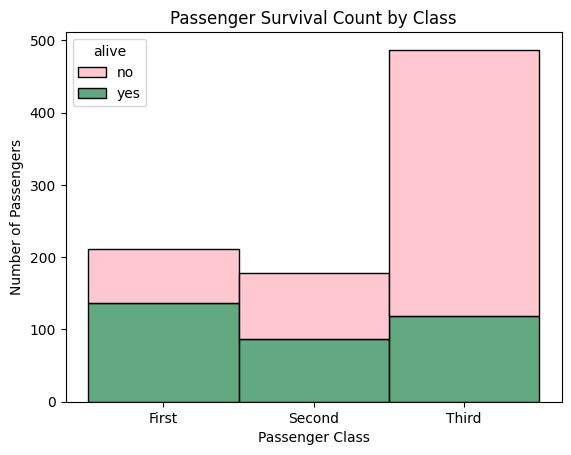

In [9]:
sns.histplot(
    data=titanic,
    x="class",
    hue="alive",
    multiple="stack",
    palette={"yes": "seagreen", "no": "lightpink"}  # custom color mapping
)

plt.title("Passenger Survival Count by Class")
plt.xlabel("Passenger Class")
plt.ylabel("Number of Passengers")
plt.show()

---

<br>


## **Task 3 — Fare × Survival (distribution comparison).**  

Compare `fare` distributions for `survived = 0` vs `1` (e.g., overlaid KDEs). Focus your interpretation on **distribution shapes**, not just means.


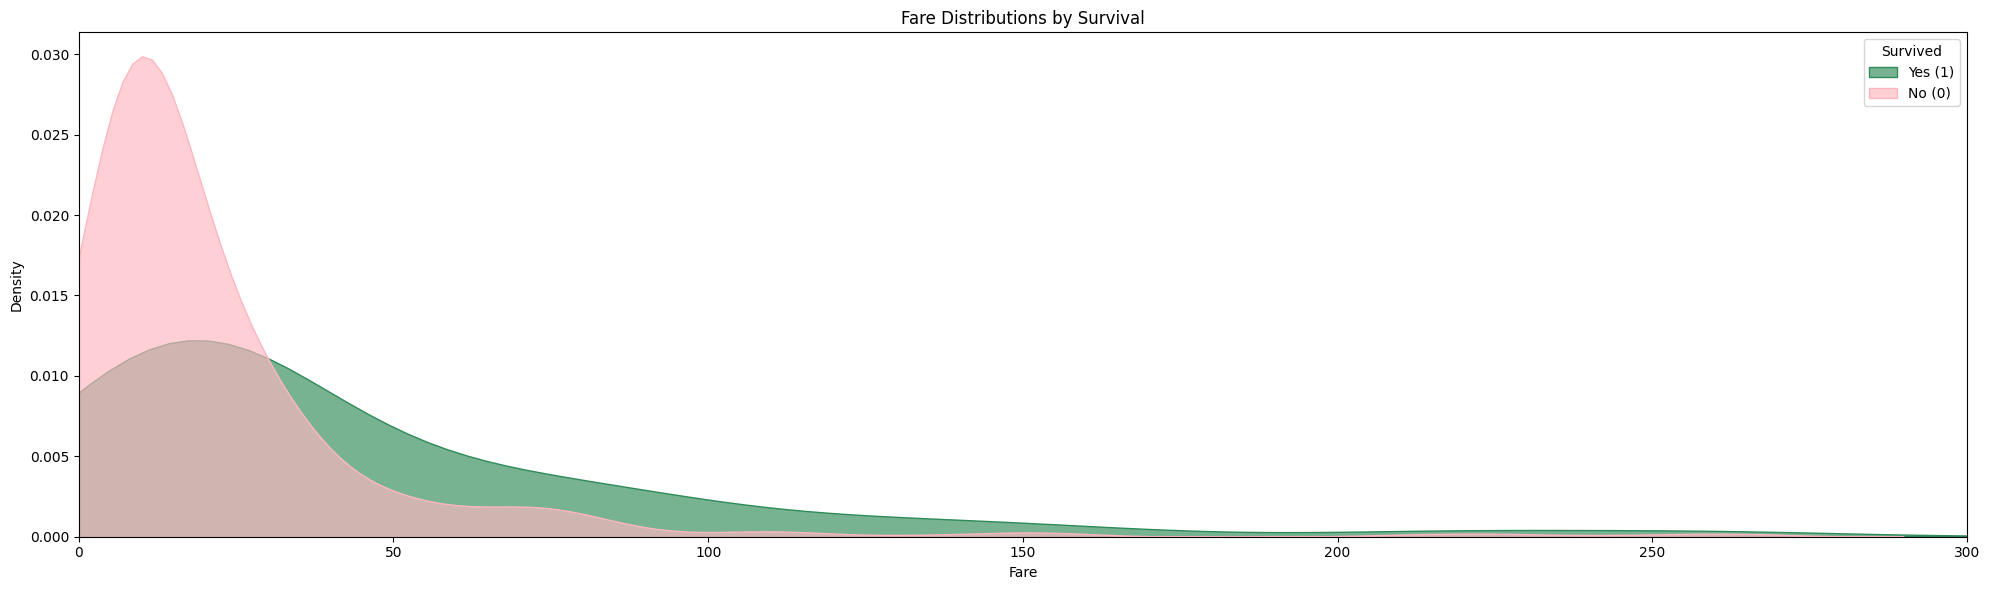

In [10]:
plt.figure(figsize=(20, 6))

sns.kdeplot(
    data=titanic,
    x="fare",
    hue="survived",
    fill=True,
    common_norm=False,
    alpha=0.65,
    palette={0: "lightpink", 1: "seagreen"}
)

plt.xlim(0, 300)
plt.xlabel("Fare")
plt.ylabel("Density")
plt.title("Fare Distributions by Survival")
plt.legend(title="Survived", labels=["Yes (1)", "No (0)"])
plt.tight_layout()
plt.show()



As we saw in the histograms above, there is a large density below 50 dollars, but now we can see that the lower the amount the passengers paid, the higher the density of deaths.

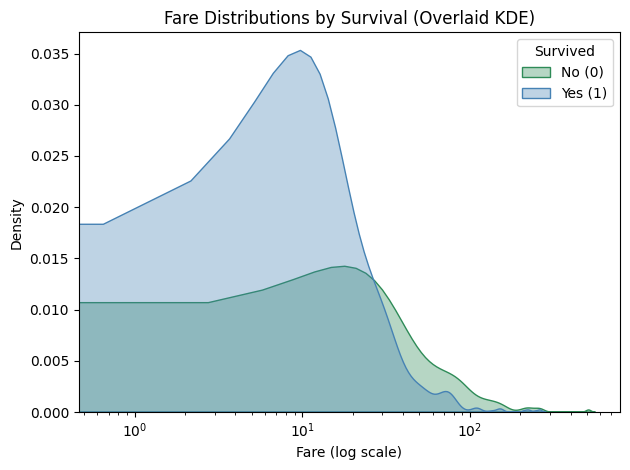

In [11]:
sns.kdeplot(
    data=titanic,
    x="fare",
    hue="survived",
    fill=True,            # shaded densities
    common_norm=False,    # each group integrates to 1 (compare shapes fairly)
    alpha=0.35,
    bw_adjust=0.8,        # tweak smoothness (lower = more detail)
    palette={0: "steelblue", 1: "seagreen"}
)

plt.xscale("log")         # fares are heavily right-skewed; log shows shape better
plt.xlabel("Fare (log scale)")
plt.ylabel("Density")
plt.title("Fare Distributions by Survival (Overlaid KDE)")
plt.legend(title="Survived", labels=["No (0)", "Yes (1)"])
plt.tight_layout()
plt.show()

## **Task 4 — Boxplot across multiple groups (fare).**  
Make a boxplot of `fare` grouped by `pclass`, with an additional split by `sex`. Interpret what differs across groups.

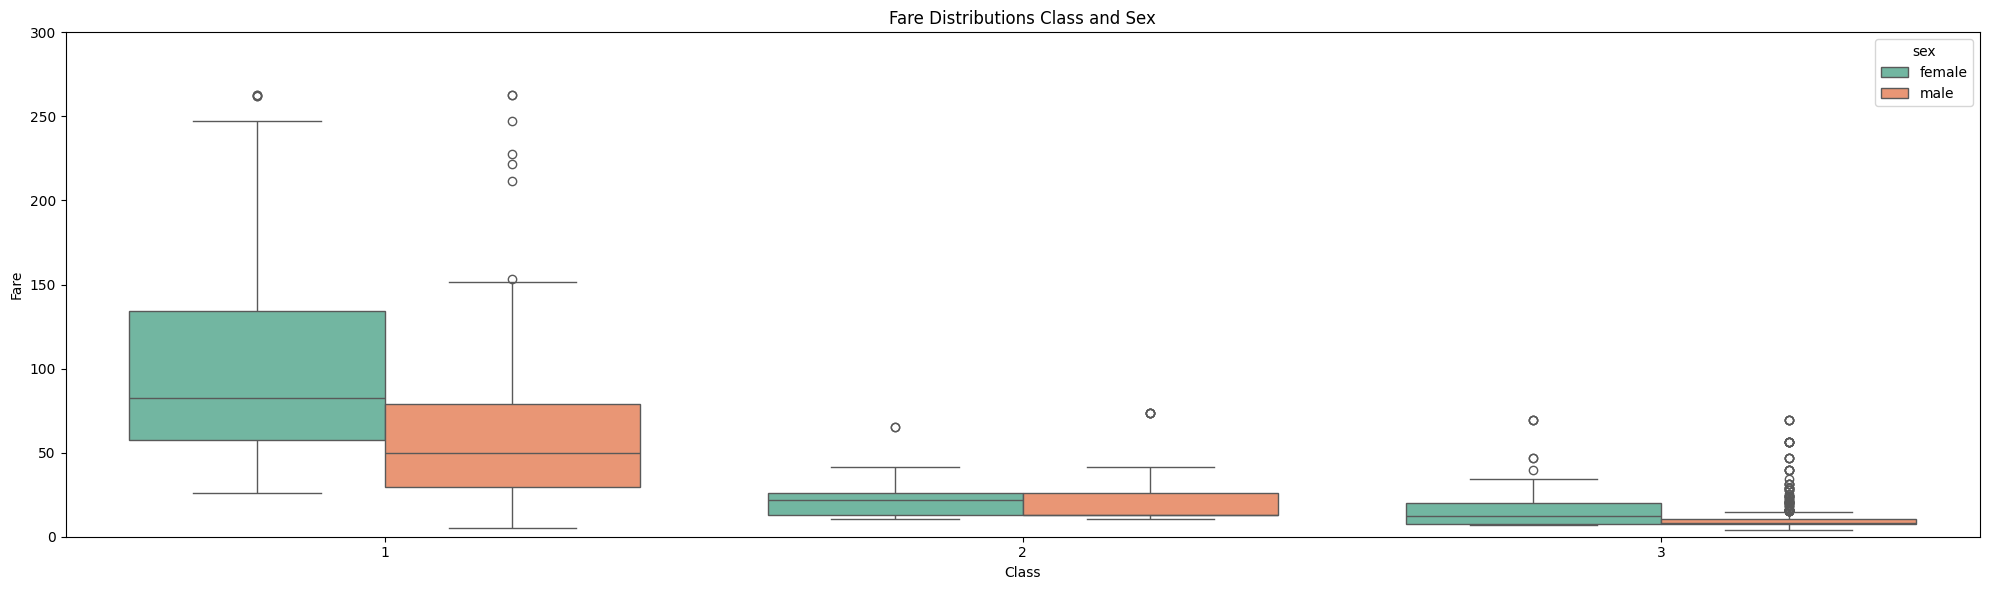

In [17]:
plt.figure(figsize=(20, 6))

sns.boxplot(data=titanic, y="fare", x="pclass", hue="sex", palette="Set2")
plt.ylim(0, 300)
plt.xlabel("Class")
plt.ylabel("Fare")
plt.title("Fare Distributions Class and Sex")
plt.tight_layout()
plt.show()



I notice immeadiately that the female tickets for both the 1st class and 3rd class. I wonder if it is because the tickets were lumped together for mothers and children or something like that. I do find it very odd that the 1st class has such a disparity. I had to set the y-lim to 300 to be able to see the 3rd class more clearly because there were so many outliers in the 1st class skewing the data.

<br><br>

---


<br><br>

## **Task 5 — Violin (age by sex).**  
Create a violin plot of `age` by `sex`. State any meaningful differences and what they suggest

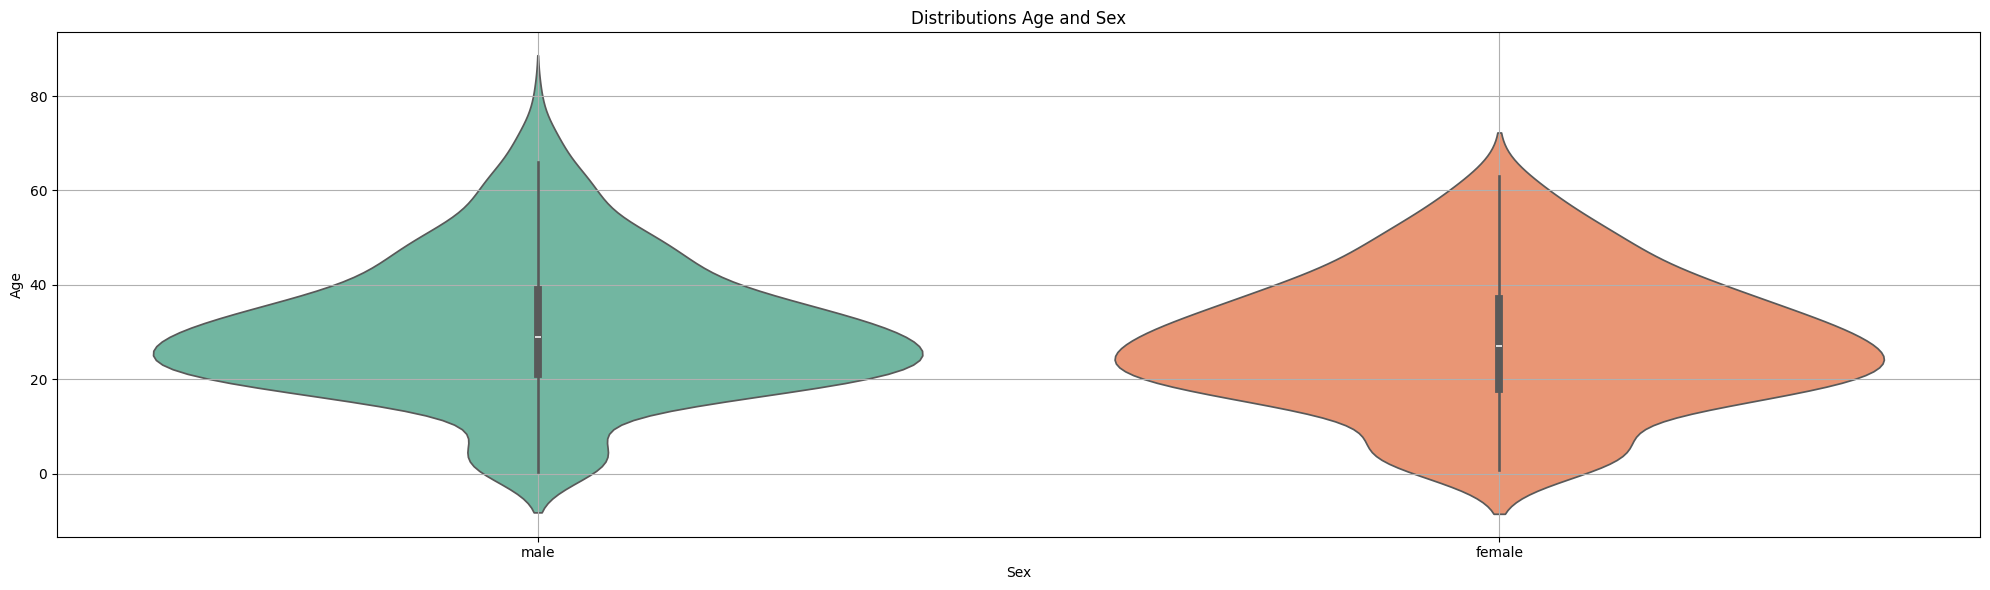

In [13]:
plt.figure(figsize=(20, 6))

sns.violinplot(data=titanic, x="sex", y="age", hue = "sex", palette="Set2")

plt.xlabel("Sex")
plt.ylabel("Age")
plt.title("Distributions Age and Sex")
plt.tight_layout()
plt.grid(True)
plt.show()

There seems to be a slight peak below 10 for male passengers and then there is a steap increase peaking around 25, so I think that there were more children below 10. There were female children were slightly older. It looks like they were closer to 10-15.

In general the female adults seem to be younger being closer to 20 than 40. in general, the highest concentration of passengers were in the 18-30 range. The slopes are slightly steeper for the men compared to the women. It seems that there were also more outliers for men, which leads to sharper peaks in the violin.

##**Task 6 — Strip (detail on top of violin or boxplot).**  
Overlay individual observations to expose clusters and outliers. Explain what becomes visible with points that’s not obvious from the aggregate shape alone.

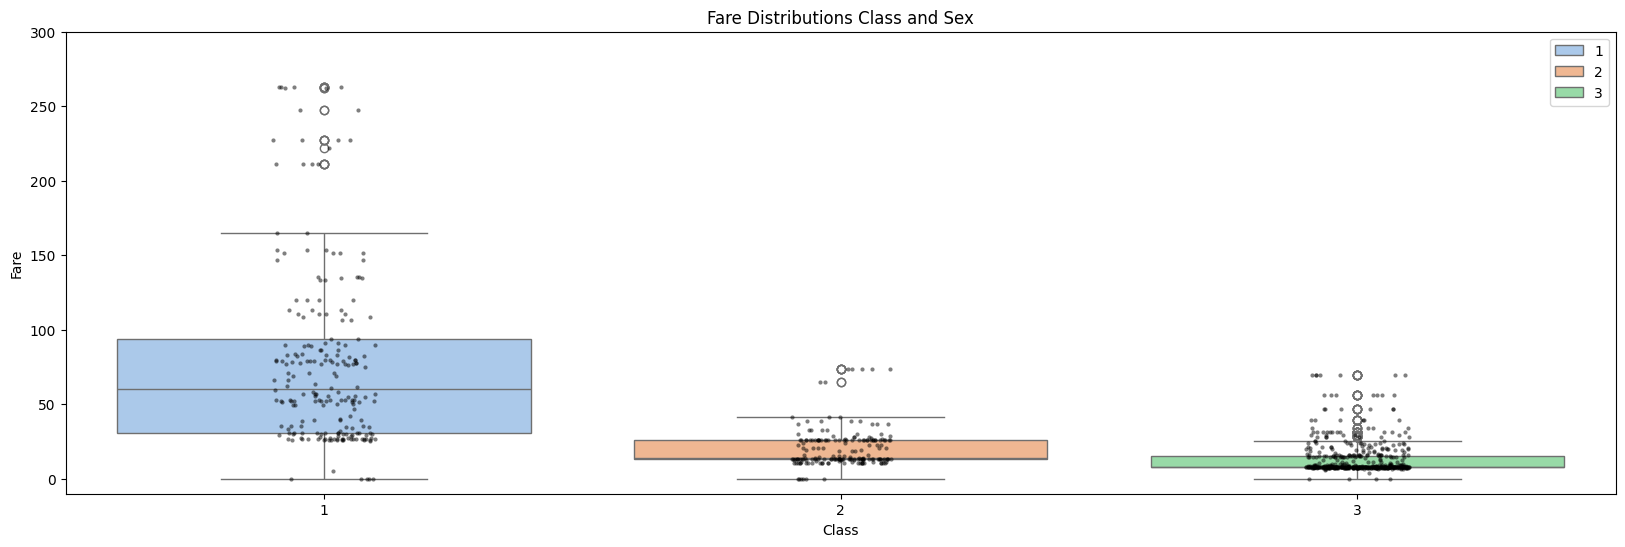

In [19]:
plt.figure(figsize=(20, 6))


sns.boxplot(
    data=titanic,
    x="pclass",
    y="fare",
    hue="pclass",
    palette="pastel"
)

sns.stripplot(
    data=titanic,
    x="pclass",
    y="fare",
    color="black",
    size=3,
    jitter=True,
    alpha=0.5
)

plt.ylim(-10, 300)
plt.xlabel("Class")
plt.ylabel("Fare")
plt.title("Fare Distributions Class and Sex")
plt.tight_layout
plt.show()


There is a much larger cluster around the median for 2nd and 3rd class, so the lower quartile is very compressed. The spread on the 1st class is much greater. I wonder if this had to do with some of the different options which were available compared to the 2nd and 3rd class passengers who probably had less options if any at all.